# *Function* Advanced (Aufgabe 7)

## Theorie

### Standart-Werte

Wenn Parameter Default-Argumente zugewiesen werden, dann werden sie für den Nutzer automatisch zu optionalen Parametern. 
Wenn eine neue *Function* erstellt wird, kommen die Optionalen Parameter immer am Schluss. Also so:

In [11]:
def gruezi(nachname, anrede = "Herr oder Frau"):
    return("Guten Tag, "+anrede+" "+nachname)

Wenn wir versuchen die optionalen Parameter an den Anfang zu stellen, meldet sich Python mit einem Error:

```python
def gruezi(anrede = "Herr oder Frau", nachname):
    return("Guten Tag, "+anrede+" "+nachname)
```

````{error} 
```python
File "<ipython-input-12-b48869b8c585>", line 1
    def gruezi(anrede = "Herr oder Frau", nachname):
              ^
SyntaxError: non-default argument follows default argument
```
````

### Reihenfolge der Argumente

Wenn die richtige Reihenfolge eingehalten wird, müssen die Parameter (z.B: `anrede=`, `nachname=`) nicht spezifiziert werden. Zum Beispiel:

In [8]:
gruezi("van Rossum", "Herr")

'Guten Tag, Herr van Rossum'

Wenn wir die Reihenfolge verändern, ist der Output unserer Funktion fehlerhaft:

In [ ]:
gruezi("Herr","van Rossum")

Aber wenn die Parameter der Argumente spezifiziert werden, ist die Reihenfolge wiederum egal:

In [9]:
gruezi(anrede = "Herr", nachname = "van Rossum")

'Guten Tag, Herr von Rossum'

### Globale und Lokale Variabeln

Innerhalb einer *Function* können nur die Variabeln verwendet werden, die der *Function* als Argumente übergeben werden (oder innerhalb der *Funktion* erstellt werden). Diese nennt man "lokale" Variabeln, sie sind lokal in der *Function* vorhanden. Im Gegensatz dazu stehen "globale" Variabeln, diese sind Teil der aktuellen Session. Folgende Vorgehensweise erzeugt also eine Fehlermeldung:


```python
# Wir definieren globale Variabeln
nachname = "van Rossum"
anrede = "Herr"

def gruezi(anrede = "Herr oder Frau", nachname):
    # nun versuchen wir in der Function auf diese
    # globalen Variabeln zu zu greifen
    return("Guten Tag, "+anrede+" "+nachname)

gruezi()
```

Dies erzeugt jedoch eine Fehlermeldung:
````{error}
```python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-16-fc94d019a607> in <module>()
      2 anrede = "Herr"
      3 
----> 4 gruezi()

TypeError: gruezi() missing 1 required positional argument: 'nachname'
```
````

### Lambda-Function

Mit dem Begriff `lambda` kann das erstellen einer Funktion verkürzt werden. Nehmen wir nochmal die *Function* `gruezi()`:

```python
def gruezi(nachname, anrede):
    return("Guten Tag, "+anrede+" "+nachname)
```

Mit `lambda` kann die *Function* folgendermassen geschrieben werden:

In [13]:
gruezi = lambda nachname, anrede: "Guten Tag, "+anrede +" "+ nachname

gruezi("van Rossum", "Herr")

'Guten Tag, Herr van Rossum'

## Übungen

Im Hinblick auf die kommende Woche entwickeln wir in dieser Übung eine *Function*, welches x/y Koordinaten zufällig in einem definierten Umkreis verschiebt. 

Um diese Function zu enwickeln nehmen wir die Koordinaten der alten Sternwarte Bern beziehungsweise deren Gedenktafel (s.u.).


In [5]:
x = 2600000
y = 1200000
accuracy = 60

```{figure} sternwarte.jpg
Links: Koordinatensystem der Schweiz, mit dem (alten) Referenzwert Sternwarte Bern. Quelle: lv95.bve.be.ch
rechts: Gedenktafel an die Alte Sternwarte Bern. Quelle: aiub.unibe.ch 
```

Das Ziel ist es also, dass wir eine *Function* haben die uns einen Zufälligen Punkt in der Nähe der alten Sternwarte vorschlägt.

### Übung 7.1: Zufallswerte generieren

Es sind verschiedene Methoden Denkbar, wie wir ein neues `x`,`y` Koordinatenpaar aus den bestehenden Koordinaten bestimmen. Die einfachste Variante ist es wohl, zu jedem Achsenwert (`x`/`y`) einzeln einen Zufallswert zu addieren, z.B. von -100 bis +100.

Wie generiert man aber Zufallszahlen in Python? Versuche dies selbst mittels deiner Lieblingssuchmaschine herauszufinden.

In [7]:
# Musterlösung

import random

# Uniforme verteilte Werte (zw. -100 bis +100)
random.randrange(-100,100)

# Normalverteilte Werte mit 
# Mittelwert 0 und
# Standartabweichung 100  
# Achtung: bei dieser Standartabweichung sind ca 30% der Werte > 100!
random.normalvariate(0,100)

74.62398736696227

### Übung 7.2: Zufallswerte addieren

Addiere nun die Zufallszahlen zu den Dummy-Werten um `x_neu` und `y_neu` zu erhalten.

In [39]:
# Musterlösung

x_neu = x+random.normalvariate(0,100)
y_neu = y+random.normalvariate(0,100)

In [40]:
print(x_neu, y_neu)

2600073.8914805483 1199911.8667191742


### Übung 7.3: Arbeitsschritte in eine *Function* verwandeln

Jetzt sind die Einzelschritte zur Verschiebung eines Punktes klar. Da wir dies für viele Punkte machen müssen, ist es sinnvoll, aus den Arbeitsschritten eine *Function* zu erstellen. Erstelle eine Function `point_offset` welche als Input eine `x` **oder** `y`Koordinate annimmt und eine leicht verschobene Koordinate zurück gibt. Wenn du möchtest kannst du die Distanz der Verschiebung als optionalen Parameter (mit *Default = 100*) definieren. 

In [8]:
# Musterlösung

def offset_coordinate(old, distance = 100):
    new = old + random.normalvariate(0,distance)

    return(new)


offset_coordinate(x, 100)

2600008.426526693

### Übung 7.4: Output visualisieren

Nun ist es wichtig, dass wir unser Resultat visuell überprüfen. Im Beispiel unten wende ich die *Function* `offset_coordinate()` 1000x auf die Koordianten der alten Sternwarte an. Für diesen Schritt gebe ich euch den fertigen Code, da ihr die dafür benötigten Techniken noch nicht gelernt habt. Füge diesen Code in dein Script ein und führe ihn aus. Allenfalls musst du den Code leicht an deine Situation anpassen.

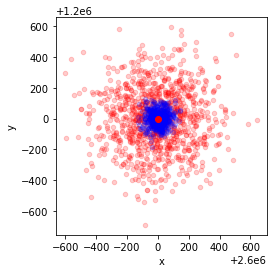

In [76]:
from matplotlib import pyplot as plt 
import pandas as pd


fig = pd.DataFrame({"x":[offset_coordinate(x, 200) for rand in range(1,1000)], "y": [offset_coordinate(y, 200) for rand in range(1,1000)]}).plot.scatter("x","y", color = "red", alpha = 0.2)


pd.DataFrame({"x":[offset_coordinate(x, 50) for rand in range(1,500)], "y": [offset_coordinate(y, 50) for rand in range(1,500)]}).plot.scatter("x","y", color = "blue", alpha = 0.2, ax = fig)

plt.scatter(x,y, c = "red")
fig.set_aspect("equal", "box")
plt.show()   